# transforms 学习

https://pytorch.org/vision/stable/transforms.html

In [6]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T
from torchvision.io import read_image
from PIL import Image
import os
from torchvision import datasets, models, transforms


# 图片类

## 类结构
最主要的是PIL.Image.Image，其它两个类是此类的子类
### PIL.Image.Image
https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image

### PIL.ImageFile.ImageFile
https://pillow.readthedocs.io/en/stable/reference/ImageFile.html#PIL.ImageFile.ImageFile

父类为PIL.Image.Image

### PIL.JpegImagePlugin.JpegImageFile
https://pillow.readthedocs.io/en/stable/reference/plugins.html#PIL.JpegImagePlugin.JpegImageFile

父类为PIL.ImageFile.ImageFile

## 常用方法
### 保存
将dataset保存到硬盘，可以使用程序D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\dataset_to_dist\save-fashion-mnist.py

In [16]:
orig_img = Image.open(Path('assets') / 'astronaut.jpg')
# JpegImageFile是ImageFile的子类
print(type(orig_img)) # <class 'PIL.JpegImagePlugin.JpegImageFile'>
img = orig_img.rotate(45)
print(type(img))
img.save(Path('assets') /'astronaut45.png')

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'PIL.Image.Image'>


### 变为numpy数组

In [ ]:
np.asarray(img) 

### 变为tensor

In [18]:
tt = transforms.ToTensor()
img = tt(img)

# 读取图片的3种方式
## read_image
D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\vision-examples-gallery\dogs.py

这里面的代码用了这个api

In [12]:
# 结果为tensor, shape = [3, 500, 500]
# 值为rgb值(0到255)
dog1 = read_image(str(Path('assets') / 'dog1.jpg'))
print(type(dog1)) # <class 'torch.Tensor'>
print(dog1.shape) # torch.Size([3, 500, 500])
# print(dog1)
# 显示x，y坐标的rgb值
x=2
y=1
print(dog1[:,x,y])

<class 'torch.Tensor'>
torch.Size([3, 500, 500])
tensor([45, 56, 58], dtype=torch.uint8)


## Image.open
D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\my-transforms-study\plot_transforms.ipynb

这里面的代码用了这个api


In [17]:
orig_img = Image.open(Path('assets') / 'astronaut.jpg')
# JpegImageFile是ImageFile的子类
print(type(orig_img)) # <class 'PIL.JpegImagePlugin.JpegImageFile'>
orig_img.rotate(45).show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>


## ImageFolder
https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

训练的代码都用了这个，使用了transforms.ToTensor()后，表示颜色的数据，都是0到1之间的小数


In [12]:
file_dir = Path('./') 
data_path = os.path.join(file_dir, "../pkg_iden/data")
def func1(img):
    print('1:',type(img)) # <class 'PIL.Image.Image'>
    r = transforms.Resize((600,800))
    img = r(img)

    print('2:',type(img))# <class 'PIL.Image.Image'>
    tt = transforms.ToTensor()
    img = tt(img)

    print('3:',type(img))
    print('4:',img.shape)
    print('5:',img)
    return img
# https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html
train_dataset = datasets.ImageFolder(os.path.join(data_path, 'train'),
                                     func1
                                    )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 1, shuffle = False, num_workers=0)
print("classes",train_dataset.classes)
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(type(images))
print(type(labels))

classes ['39', '620', 'aoli', 'eber', 'fengshi', 'kouzhao', 'kushen', 'lianhua', 'ningjiao', 'nut', 'shangtong', 'yikang', 'zhuangyao', 'zhuodu']
1: <class 'PIL.Image.Image'>
2: <class 'PIL.Image.Image'>
3: <class 'torch.Tensor'>
4: torch.Size([3, 600, 800])
5: tensor([[[0.9333, 0.9333, 0.9333,  ..., 0.9961, 0.9961, 1.0000],
         [0.9294, 0.9294, 0.9294,  ..., 0.9961, 0.9961, 1.0000],
         [0.9098, 0.9137, 0.9176,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.2941, 0.2431, 0.2392,  ..., 0.7961, 0.8784, 0.9373],
         [0.3882, 0.2706, 0.2706,  ..., 0.8078, 0.8863, 0.9451],
         [0.6157, 0.5843, 0.5882,  ..., 0.8353, 0.9059, 0.9569]],

        [[0.9216, 0.9216, 0.9216,  ..., 0.9922, 0.9961, 1.0000],
         [0.9176, 0.9176, 0.9216,  ..., 0.9922, 0.9961, 1.0000],
         [0.9020, 0.9059, 0.9098,  ..., 0.9922, 0.9922, 0.9922],
         ...,
         [0.3059, 0.2588, 0.2706,  ..., 0.8275, 0.9059, 0.9608],
         [0.3922, 0.2824, 0.2941,  ..., 0.8353, 0.9098, 0.

## plt.imshow支持的图片格式

numpy数组，rgb用0-1之间的小数表示

也可以是255的rgb


# 常用Transforms

## transforms.Normalize
https://pytorch.org/vision/stable/generated/torchvision.transforms.Normalize.html#torchvision.transforms.Normalize

PyTorch_A_60_Minute_Blitz中的例子用了这个，取值为transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

其它地方都是用这个值transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

还有些地方没用Normalize,这几种有啥区别

1.没用Normalize的，取值范围0--1

2.用0.5Normalize的，取值范围(1-0.5/0.5)=1,(0-0.5)/0.5=-1,即-1到1

3. 0.485Normalize的取值范围，如下

In [4]:
print('R',(0-0.485)/0.229,(1-0.485)/0.229)
print('G',(0-0.456)/0.224,(1-0.456)/0.224)
print('B',(0-0.406)/0.225,(1-0.406)/0.225)

R -2.1179039301310043 2.2489082969432315
G -2.0357142857142856 2.428571428571429
B -1.8044444444444445 2.6399999999999997


## transforms.Pad
例子看这个：anders-test\my-transforms-study\plot_transforms.py

图片大小不变，给图片加边框，最终大小为图片原来的尺寸加边框的尺寸

## transforms.Resize
https://pytorch.org/vision/stable/generated/torchvision.transforms.Resize.html

缩放图片到指定大小，如果只给定了一个大小，则最小边缩放到指定大小，大边按比例缩放

例子看这个：anders-test\my-transforms-study\plot_transforms.py

这个例子看不出大小的变换，只看到几个图片模糊了，因为显示图形的时候又它们变成一样大了

## transforms.CenterCrop
https://pytorch.org/vision/stable/generated/torchvision.transforms.CenterCrop.html

在中心裁剪给定的图像,图片的大小为指定的大小

例子看这个：anders-test\my-transforms-study\plot_transforms.py

## transforms.FiveCrop
将四个角和中心的图像组成一个tuple返回

## transforms.Grayscale
https://pytorch.org/vision/stable/generated/torchvision.transforms.Grayscale.html

将图片变为灰度图片

## transforms.ColorJitter
https://pytorch.org/vision/stable/generated/torchvision.transforms.ColorJitter.html

改变图片的明亮度等参数，图片的这几个参数不是很懂

## transforms.GaussianBlur
https://pytorch.org/vision/stable/generated/torchvision.transforms.GaussianBlur.html

将图像变模糊

# Random Transforms

## transforms.RandomPerspective
https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomPerspective.html


随机透视变换，视角变换引起的图片变化
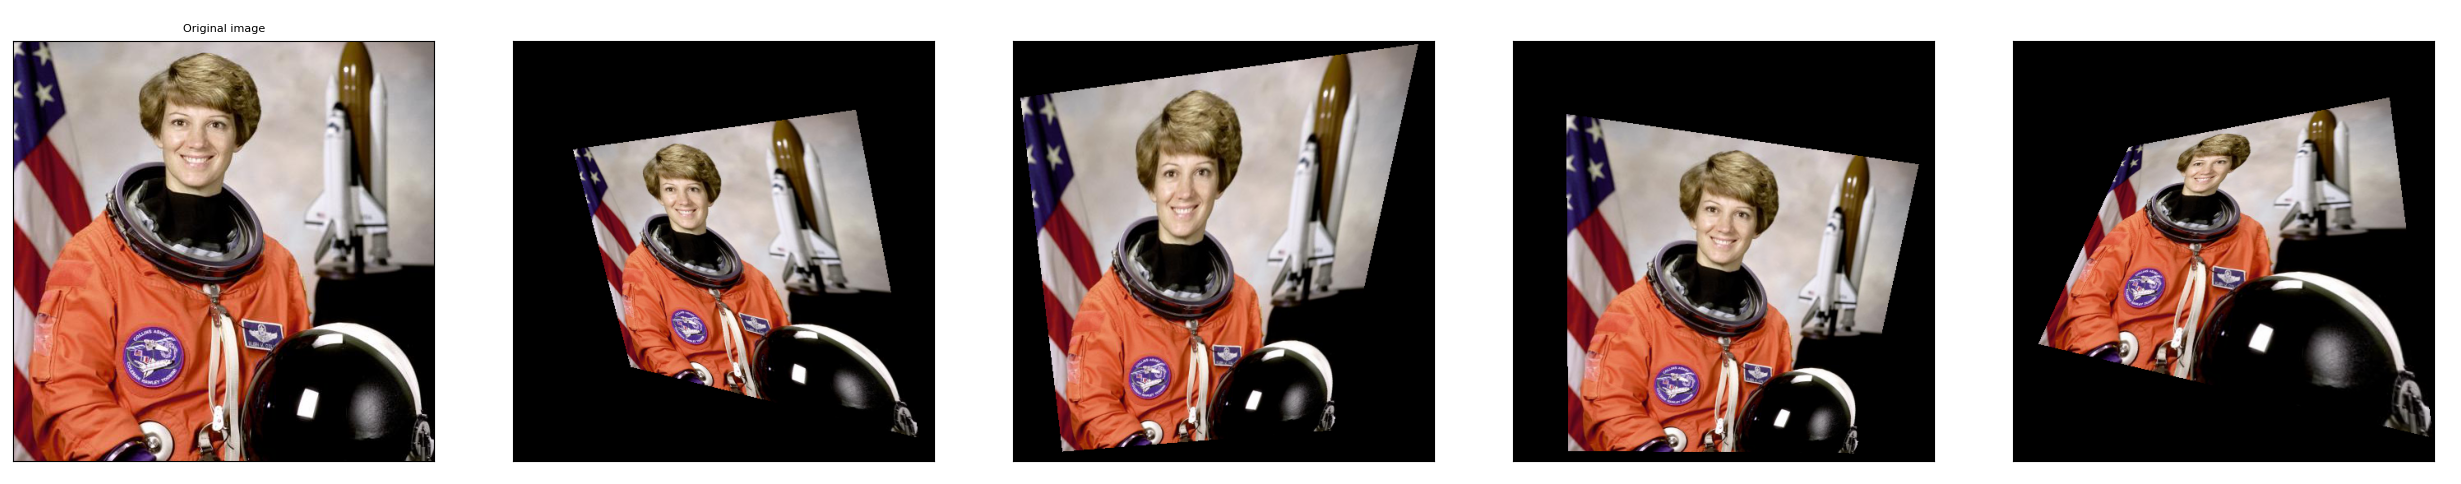

## transforms.RandomRotation
https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomRotation.html

随机旋转


## transforms.RandomAffine

https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomAffine.html

功能:对图像进行仿射变换，仿射变换是二维的线性变换，由五种基本原子变换构成，分别是旋转、平移、缩放、错切和翻转

## transforms.ElasticTransform
https://pytorch.org/vision/stable/generated/torchvision.transforms.ElasticTransform.html

弹性变换算法(Elastic Distortion)最先是由Patrice等人在2003年的ICDAR上发表的《Best Practices for Convolutional Neural Networks Applied to Visual Document Analysis》提出的，最开始应用在mnist手写体数字识别数据集中，发现对原图像进行弹性变换的操作扩充样本以后，对于手写体数字的识别效果有明显的提升。此后成为一种很普遍的扩充字符样本图像的方式。


## transforms.RandomResizedCrop
https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomResizedCrop.html#torchvision.transforms.RandomResizedCrop



## transforms.RandomHorizontalFlip
https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomHorizontalFlip.html#torchvision.transforms.RandomHorizontalFlip



## 后面还有很多，不想看了